In [1]:
library(e1071)
library(caret)
library(ggplot2)
library(Metrics)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'Metrics'


The following objects are masked from 'package:caret':

    precision, recall




In [2]:
df <- read.csv("../../../Cleaned Datasets R/prices_cleaned.csv")

set.seed(42)

train_index <- createDataPartition(df$Price, p = 0.8, list = FALSE)

train_data <- df[train_index, ]
test_data <- df[-train_index, ]

In [3]:
model <- svm(Price ~ ., data = train_data, type = 'eps-regression',
     kernel = "radial", cost = 100, gamma = 0.05)

print(model)
summary(model)


Call:
svm(formula = Price ~ ., data = train_data, type = "eps-regression", 
    kernel = "radial", cost = 100, gamma = 0.05)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  100 
      gamma:  0.05 
    epsilon:  0.1 


Number of Support Vectors:  6827




Call:
svm(formula = Price ~ ., data = train_data, type = "eps-regression", 
    kernel = "radial", cost = 100, gamma = 0.05)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  100 
      gamma:  0.05 
    epsilon:  0.1 


Number of Support Vectors:  6827






In [4]:
predictions <- predict(model, test_data)
actual <- test_data$Price

In [5]:
mae_value <- mae(actual, predictions)
print(paste("Mean Absolute Error:", mae_value))

mse_value <- mse(actual, predictions)
print(paste("Mean Squared Error:", mse_value))

rmse_value <- rmse(actual, predictions)
print(paste("Root Mean Squared Error:", rmse_value))

r_squared_value <- summary(lm(predictions ~ actual))$r.squared
print(paste("R-squared score:", r_squared_value))

[1] "Mean Absolute Error: 0.328953139447074"
[1] "Mean Squared Error: 0.283467107934699"
[1] "Root Mean Squared Error: 0.532416291950855"
[1] "R-squared score: 0.724520889774229"


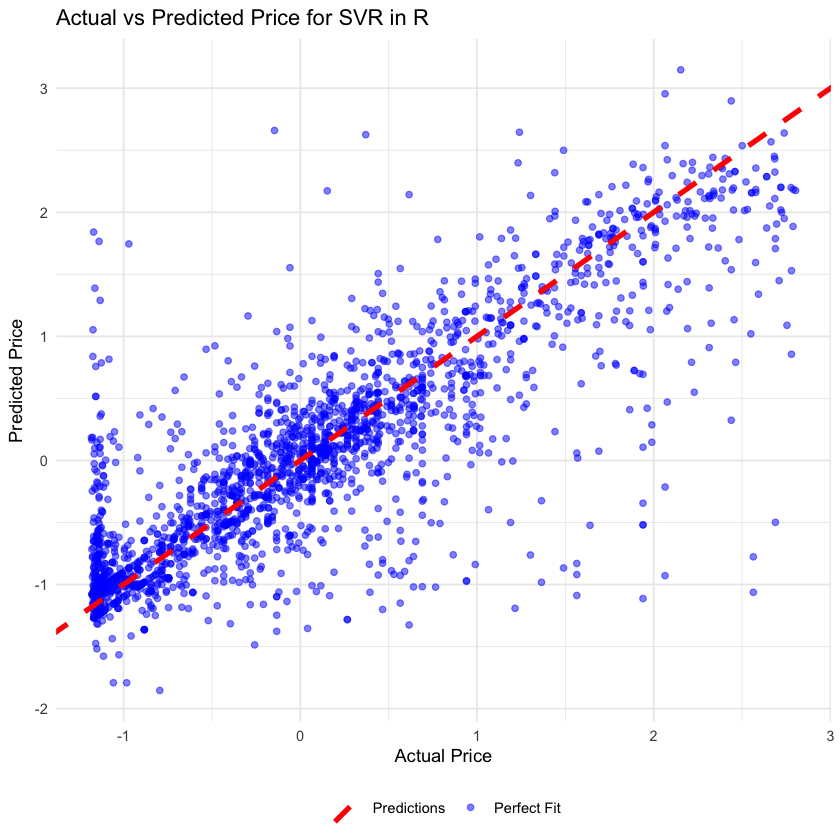

In [6]:
data_plot <- data.frame(
  Actual = actual,
  Predicted = predictions
)

ggplot(data_plot, aes(x = Actual, y = Predicted)) +
  geom_point(aes(color = "Predictions"), alpha = 0.5) + 
  geom_abline(aes(color = "Perfect Fit", intercept = 0, slope = 1), linetype = "dashed", linewidth = 1.5) +
  scale_color_manual(values = c("Predictions" = "blue", "Perfect Fit" = "red"), name = "", labels = c("Predictions", "Perfect Fit")) +
  labs(title = "Actual vs Predicted Price for SVR in R", 
       x = "Actual Price", 
       y = "Predicted Price") +
  theme_minimal() +
  theme(legend.position = "bottom")